In [0]:
#Pulled from https://www.tensorflow.org/tutorials/keras/classification on October 31, 2019 at 1:00 PM MST

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

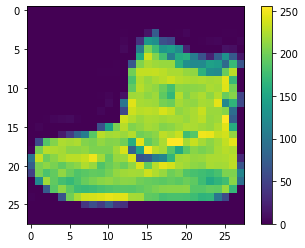

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

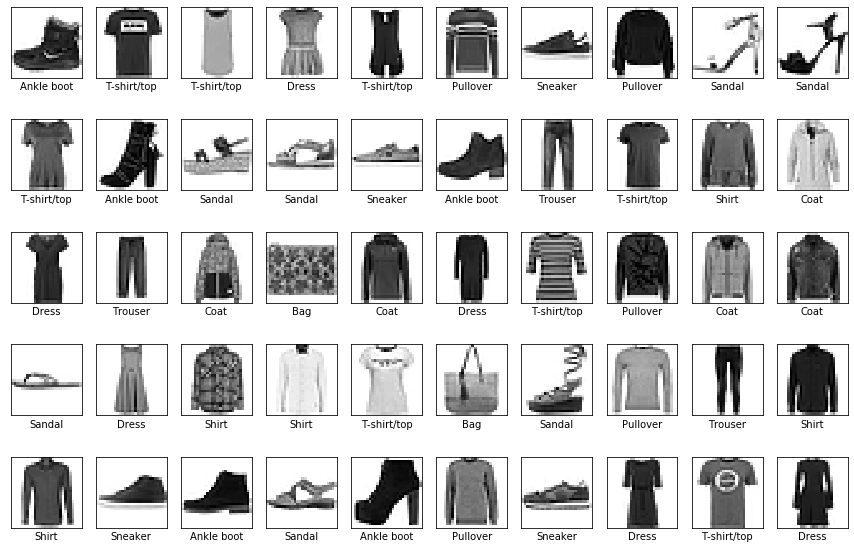

In [0]:
plt.figure(figsize=(15,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Quick easy implementations, first increase the number of nodes.  Then, add another layer or two.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
# This is the default.  See if you can do better. .8701
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'],
#               )
# SO, I don't know what the deal is.  It seems like after some point in time after running multiple
# times, accuracy just drops.  I don't know if it's because I was trying a bunch of things and it
# keeps peices of something or what.  But even running the default code given, it is less than 10%
# accurate.  I have to run everything all over to clear this out or something to get back to a good
# point.  Does it happen when I change optimizers?  It's still unclear.
# opt = keras.optimizers.Adagrad(learning_rate=0.05)
# opt = keras.optimizers.SGD(learning_rate=0.05, momentum=0.0, nesterov=False)
# opt = keras.optimizers.SGD(learning_rate=0.05, momentum=0.0, nesterov=False)
# opt = keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.2, beta_2=0.999).8742
opt = keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.2, beta_2=.999)
# # opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
# los = keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)
los = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,
              loss=los,
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=25)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5075 - acc: 0.8134
Epoch 2/25
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3800 - acc: 0.8601
Epoch 3/25
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3401 - acc: 0.8747
Epoch 4/25
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3203 - acc: 0.8818
Epoch 5/25
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3008 - acc: 0.8877
Epoch 6/25
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2859 - acc: 0.8933
Epoch 7/25
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2747 - acc: 0.8971
Epoch 8/25
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2659 - acc: 0.8995
Epoch 9/25
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2553 - acc: 0.9028
Epoch 10/25
60000/60000 [==============================]